In [1]:
import specular
import numpy as np
import matplotlib.pyplot as plt

## 2. Numerical ordinary differential equations

### 2.1 Classical schemes

In [4]:
def F(t, u):
    return -3*u 

specular.ode.solver.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="Explicit Euler")

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


In [5]:
def F(t, u):
    return -3*u 

specular.ode.solver.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="Explicit Euler").values()

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1.00000000e+00, 7.00000000e-01, 4.90000000e-01, 3.43000000e-01,
        2.40100000e-01, 1.68070000e-01, 1.17649000e-01, 8.23543000e-02,
        5.76480100e-02, 4.03536070e-02, 2.82475249e-02, 1.97732674e-02,
        1.38412872e-02, 9.68890104e-03, 6.78223073e-03, 4.74756151e-03,
        3.32329306e-03, 2.32630514e-03, 1.62841360e-03, 1.13988952e-03,
        7.97922663e-04]))

Running the explicit Euler scheme: 100%|██████████| 20/20 [00:00<?, ?it/s]


Figure saved to figures\Explicit-Euler


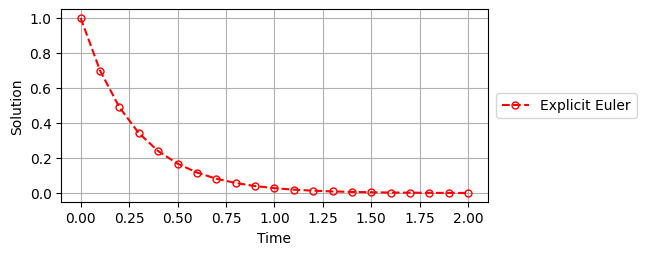

In [6]:
def F(t, u):
    return -3*u 

specular.ode.solver.classical_scheme(F=F, u_0=1.0, t_0=0.0, T=2.0, h=0.1, scheme="Explicit Euler").visualization(save_path="Explicit Euler")

Running the implicit Euler scheme: 100%|██████████| 90/90 [00:00<00:00, 59880.61it/s]


Figure saved to figures\Implicit-Euler


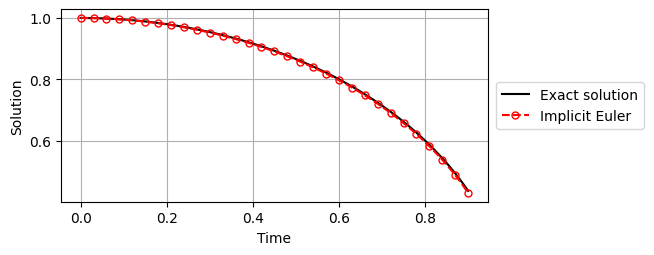

Table saved to tables\Implicit-Euler.csv


,Numerical solution,Exact solution,Error
Time,,,
0.00,1.000000,1.000000,0.000000
0.01,0.999900,0.999950,0.000050
0.02,0.999700,0.999800,0.000100
0.03,0.999400,0.999550,0.000150
0.04,0.999000,0.999200,0.000200
...,...,...,...
0.86,0.504465,0.510294,0.005829
0.87,0.487036,0.493052,0.006016
0.88,0.468751,0.474974,0.006223


In [7]:
def F(t, u):
    return -(t*u)/(1-t**2)

def exact_sol(t):
    return np.sqrt(1 - t**2)
    
def u_0(t_0):
    return exact_sol(t_0)

specular.ode.solver.classical_scheme(F=F, u_0=u_0, t_0=0.0, T=0.9, h=0.01, scheme="Implicit Euler").visualization(exact_sol=exact_sol, save_path="Implicit Euler").table(exact_sol=exact_sol, save_path="Implicit Euler")

### 2.2 Specular trigonometric scheme

### 2.3 Specular Euler scheme